# Using and Interpreting Indicator (Dummy) Variables

We often gloss over indicator variables in our statistics courses, but not only are they (in my view) one of the most powerful tools in a data scientist's tool box, but I cannot tell you how much I see people struggle with *interpreting* indicator variables in their regressions. So in this tutorial, I'll try to give them the treatment they deserve, and hopefully by the end, you've have a firm understanding not only of how to use *and interpret* Indicator Variables.

## What are indicator variables?

Indicator variables -- sometimes also referred to as dummy variables, though I don't know why -- are variables that take on only the value of 0 and 1, and are used to *indicate* whether a given observation belongs to a discrete category in a way that can be used in statistical models. 

For example, indicator variables can be used to indicate if an survey respondent is a woman (if the variable is 1 for women, 0 otherwise) or a Democrat (if the variable is 1 for democrats, 0 otherwise). In addition, as discussed in more detail below, collections of indicator variables can also be used to code categorical variables that take on more than 2 variables using a method called "one-hot encoding). This allows use to work with variables that have many levels, like an individual's political party registration (which could be Democrat, Independent, or Republican). 

## The ONE thing that you must understand when using indicator variables:

When you put an indicator variable in a regression model, there are two things you must always keep in mind about interpreting the coefficients associated with the indicator variable: 

1) The coefficient on an indicator variable is an estimate of the average **DIFFERENCE** in the dependent variable for the group identified by the indicator variable (after taking into account other variables in the regression) and

2) the **REFERENCE GROUP**, which is the set of observations for which the indicator variable is always zero. 

If you always remember that the coefficient on an indicator variable is an estimate of a **DIFFERENCE** with respect to a **REFERENCE GROUP** (also sometimes referred to as the "omitted category"), you're 90% of the way to understanding indicator variables. 

I recognize this may feel obvious, but trust me: I've literally reviewed papers from tenured faculty at major Universities that get this wrong. This is something people get confused about constantly, so I promise it's worth this treatment. 

OK, let's get concrete. 

## Indicator Variables with Two Category Variable

Let's start with a simple model in which we wish to predict voter turnout using data from North Carolina. Suppose we're interested in looking at how turnout varies by gender, which is dichotomous in the North Carolina voter file (obviously this is somewhat problematic given what we've come to know about gender, but in most datasets you'll find a dichotomous coding). 

In [1]:
# Load data we'll use. Should work for anyone.
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

voters = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "css_tutorials/master/exercise_data/voter_turnout.csv"
)
voters.head()

,age,gender,voted,party,race
0,71,FEMALE,1,UNAFFILIATED,WHITE
1,47,MALE,1,UNAFFILIATED,WHITE
2,29,MALE,0,DEMOCRATIC,WHITE
3,60,MALE,1,REPUBLICAN,WHITE
4,84,MALE,0,DEMOCRATIC,WHITE


In [2]:
# Create a 0/1 variable for female.
voters["female"] = voters.gender == "FEMALE"
voters.head()

,age,gender,voted,party,race,female
0,71,FEMALE,1,UNAFFILIATED,WHITE,True
1,47,MALE,1,UNAFFILIATED,WHITE,False
2,29,MALE,0,DEMOCRATIC,WHITE,False
3,60,MALE,1,REPUBLICAN,WHITE,False
4,84,MALE,0,DEMOCRATIC,WHITE,False


In [3]:
import statsmodels.formula.api as smf

model = smf.ols("voted ~ female", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7416
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.389
Time:                        16:32:48   Log-Likelihood:                -5768.3
No. Observations:                9919   AIC:                         1.154e+04
Df Residuals:                    9917   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7461      0.007    113.927      0.000       0.733       0.759
female[T.True]     0.0075      0.009      0.861      0.389      -0.010       0.025
==============================================================================
Omnibus:                     1890.028   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.714
Skew:                          -1.156   Prob(JB):                         0.00
Kurtosis:                       2.337   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

OK, so how do we interpret this coefficient of 0.0075 on female? As we said before, it is the average **DIFFERENCE** in the dependent variable (Whether the person votes) with respect to a **REFERENCE GROUP**. The reference group is *the group for whom the indicator is always equal to zero*, which in this case is the set of male voters. 

So this says that women are 0.7% *more likely to vote (in North Carolina) then men.*

Now let's try a more interesting example: Democrats. 

In [4]:
voters.party.value_counts()  # OK, note here that there are THREE party registrations in this data.

party
DEMOCRATIC      4426
REPUBLICAN      3365
UNAFFILIATED    2128
Name: count, dtype: int64

In [5]:
# So let's do the same thing as before for Democrats
voters["democrat"] = voters.party == "DEMOCRATIC"
voters.head()

,age,gender,voted,party,race,female,democrat
0,71,FEMALE,1,UNAFFILIATED,WHITE,True,False
1,47,MALE,1,UNAFFILIATED,WHITE,False,False
2,29,MALE,0,DEMOCRATIC,WHITE,False,True
3,60,MALE,1,REPUBLICAN,WHITE,False,False
4,84,MALE,0,DEMOCRATIC,WHITE,False,True


In [6]:
# Note that because we're estimating a linear probability
# model we need to use heteroskedastic robust
# standard errors.

model = smf.ols("voted ~ democrat", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     40.81
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.76e-10
Time:                        16:32:48   Log-Likelihood:                -5748.0
No. Observations:                9919   AIC:                         1.150e+04
Df Residuals:                    9917   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7754      0.006    137.665      0.000       0.764       0.786
democrat[T.True]    -0.0562      0.009     -6.388      0.000      -0.073      -0.039
==============================================================================
Omnibus:                     1865.360   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2361.772
Skew:                          -1.149   Prob(JB):                         0.00
Kurtosis:                       2.343   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

So now how do we interpret this coefficient on Democrats (-0.056)? As before it's the average **DIFFERENCE** in the dependent variable between the indicated group (Democrats) and the reference group. But what's the reference group? Republicans?

No -- the **reference group** or **omitted category** is anyone for whom the indicator variable is always zero -- in this case, all non-Democrats, whether they're Republicans or Unaffiliated. 

So this result says that Democrats are less likely to vote than non-Democrats, but NOT that they're less likely to vote than Republicans per se. 

So how do we deal with multiple categories? With multiple indicator variables!

## Indicator Variables for variables with more than 2 categories

To deal with categorical variables with more than 2 categories, we create indicator variables for all values of the variable *except one*. The one group for which we do not create an indicator variable will become the **reference group** for the regression. The choice of which value to make the reference category won't substantively change the results of the regression -- for example, if you also have a control for age, the coefficient on age will always be the same regardless of the reference group used -- but it does influence how easily you can interpret the results of the regression. 

This practice of creating a *collection* of indicator variables to encode a single categorical variable is what's called "one-hot encoding" by computer scientists / machine learning people. 

Since we're interested in the difference in turnout between Democrats and Republicans, let's make Republicans the reference category, and make indicators for Democrats and Unaffiliated voters. 

In [7]:
voters["unaffiliated"] = voters.party == "UNAFFILIATED"
voters.head()

,age,gender,voted,party,race,female,democrat,unaffiliated
0,71,FEMALE,1,UNAFFILIATED,WHITE,True,False,True
1,47,MALE,1,UNAFFILIATED,WHITE,False,False,True
2,29,MALE,0,DEMOCRATIC,WHITE,False,True,False
3,60,MALE,1,REPUBLICAN,WHITE,False,False,False
4,84,MALE,0,DEMOCRATIC,WHITE,False,True,False


In [8]:
model = smf.ols("voted ~ democrat + unaffiliated", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     35.67
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           3.67e-16
Time:                        16:32:48   Log-Likelihood:                -5735.2
No. Observations:                9919   AIC:                         1.148e+04
Df Residuals:                    9916   BIC:                         1.150e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.7988      0.007    115.554      0.000       0.785       0.812
democrat[T.True]        -0.0797      0.010     -8.240      0.000      -0.099      -0.061
unaffiliated[T.True]    -0.0606      0.012     -5.143      0.000      -0.084      -0.037
==============================================================================
Omnibus:                     1854.446   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2341.346
Skew:                          -1.144   Prob(JB):                         0.00
Kurtosis:                       2.344   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

(Note that we also could have used the syntax `smf.ols('voted ~ C(party)', voters)`, which will automatically convert your data into one-hot encodings, but then you don't get to pick the omitted category, and sometimes it's nice to be explicit.)

How do we interpret these results? 

First, we see that the coefficient on `democrat` is -0.08. That means that the **DIFFERENCE** in turnout between Democrats and the reference group (here, Republicans) is 8%. So Democrats have 8 percentage point lower turnout on average in this data than Republicans. 

Second, we see that the coefficient on `unaffiliated` is -0.06. That means that the **DIFFERENCE** in turnout between Unaffiliated voters and the reference group (here, Republicans) is 6%. So Unaffiliated voters have 6 percent point lower turnout on average in this data than Republicans. 

Moreover, the p-value on these indicator variables tells us if these differences are significant. And indeed, they show clearly that the difference between Democrats and Republicans, and the difference between Unaffiliated voters and Republicans are both significant. 

But what about the difference between Democrats and Unaffiliated voters? Well, turns out the regression doesn't give us that directly. To get that, we have to do some additional math. 

First, it's easy to estimate the difference in coefficients:

```
dem - unaffiliated = (dem - republican) - (unaffiliated - republican)
                   = -0.08 - -0.06
                   = -0.02
```                   
So in other words, Democrats have 2 percentage point lower turnout than Unaffiliated voters. 

But is this difference statistically significant? For that we have to run a post-regression test. (In R, you can do these with the `car` library using the `LinearHypothesis` function)

In [9]:
model = smf.ols("voted ~ democrat + unaffiliated", voters).fit()
model = model.get_robustcov_results("HC3")

hypothesis = "democrat[T.True] = unaffiliated[T.True]"
model.t_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0191      0.012     -1.634      0.102      -0.042       0.004

Voila -- p-value of 0.1.

Wanna confirm it? let's change our reference group to `unaffiliated`. Then when we look at the coefficient on `democrat`, that will be the difference between Democrats and the new reference group (Unaffiliated voters)

In [10]:
voters["republican"] = voters.party == "REPUBLICAN"
model = smf.ols("voted ~ democrat + republican", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     35.67
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           3.67e-16
Time:                        16:32:48   Log-Likelihood:                -5735.2
No. Observations:                9919   AIC:                         1.148e+04
Df Residuals:                    9916   BIC:                         1.150e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7383      0.010     77.436      0.000       0.720       0.757
democrat[T.True]      -0.0191      0.012     -1.634      0.102      -0.042       0.004
republican[T.True]     0.0606      0.012      5.143      0.000       0.037       0.084
==============================================================================
Omnibus:                     1854.446   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2341.346
Skew:                          -1.144   Prob(JB):                         0.00
Kurtosis:                       2.344   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

As we can now see, the coefficient on `democrat` (now the difference between Democrats and Unaffiliated voters) is exactly what we'd calculated above (-0.019) and has the same p-value we calculated previously (0.1). 

This just goes to show that the choice of reference group doesn't change what's actually being estimated, *it just changes the interpretation of coefficients* and what statistics pop right out of the regression output, and which values require a little extra work to get.

## Interactions with Constant Variables

**Like regular Indicators, but for differences in SLOPE rather than differences in LEVELS!**

Congratulations! You're a pro at indicator variables. Now we can turn to INTERACTIONS!

Interactions (at least when you interact an indicator variable with a continuous variable), just like a regular indicator variables, report **differences** between a group and the reference group. The difference is that instead of reporting the difference in **average value** of the dependent variable between the indicated group and the reference group, the coefficient on an interaction term is the average **DIFFERENCE** in the **SLOPE** associated with the continuous variable between the indicated group and the reference group. 

Let's be concrete: let's suppose we think that turnout among men increases as they get older by a larger amount than for women. In other words, we think that turnout increases with age for both groups, but that there's a **DIFFERENCE** in the amount it increases with age. 

To test this, we need to create some interaction terms. But first, a quick note: when doing interactions, it's critical to not only include all the interaction terms that interest you, **but also all the variables in the interaction as stand-alone variables.** So for this we want `age` interacted with `female`. But while the coefficient on that estimate is what we're interested in, to get the right results we also need to include just `age` and just `female`.

In [11]:
voters["age_x_female"] = voters.age * voters.female
model = smf.ols("voted ~ age + female + age_x_female", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.124
Time:                        16:32:48   Log-Likelihood:                -5764.7
No. Observations:                9919   AIC:                         1.154e+04
Df Residuals:                    9915   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6961      0.029     23.789      0.000       0.639       0.753
female[T.True]     0.0933      0.039      2.370      0.018       0.016       0.171
age                0.0009      0.000      1.759      0.079   -9.81e-05       0.002
age_x_female      -0.0015      0.001     -2.237      0.025      -0.003      -0.000
==============================================================================
Omnibus:                     1883.068   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.508
Skew:                          -1.156   Prob(JB):                         0.00
Kurtosis:                       2.340   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

The coefficient on our interaction is -0.0015. Does that mean that as women get older, their turnout rate declines by -0.15 percentage points per year? **NO!**

It says that however turnout varies with age for men, turnout will vary with age by 0.0015 *less* for women. It is the **DIFFERENCE** in slopes between the two groups.

The coefficient on `age` tells us how turnout varies with age **for the reference group**. So it says that for men, turnout increases by 0.09 percentage points per year. 

But if you want to know how women's turnout varies with age, you have to **ADD** the coefficient on `age` (the rate of change for me) plus the coefficient on `age_x_female` (the difference between the rate of men and women). 

So going through all these coefficients, we have: 

- `female` (0.09): Controlling for age, women are 9 percentage points more likely to vote than men. 
- `age` (0.0009): As men get one year older, they become 0.09 percentage points more likely to vote. 
- `age_x_female` (-0.0015): As women get one year older, the likelihood they vote increases by 0.1 percentage point per year *less* than men's likelihood of voting increases per year. 

So how much does women's turnout increase if they age one year? 0.0009 + -0.0015 = -0.0006. So female turnout actually *declines* by 0.06 percentage points a year.

Now let's talk statistical significance. The p-value on age shows us that there's a statistically significant relationship between age and turnout **for men**. The p-value for `age_x_female` tells us that there's a statistically significant **difference** between men and women in how turnout varies with age. But is there a statistically significant relationship between age and turnout for women?

Again, we don't actually get an answer from our regression. To see, we have to run the following: 

In [12]:
model = smf.ols("voted ~ age + female + age_x_female", voters).fit()
model = model.get_robustcov_results("HC3")
hypothesis = "age + age_x_female = 0"
model.t_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0006      0.000     -1.389      0.165      -0.001       0.000

So the p-value is 0.17 for the relationship between female and age (and the coefficient of -0.0006, just like we calculated above!)

### Keeping Things Straight

When you want to know a quantity, how can you figure out what coefficients to look at if you don't remember these rules?

The simplest way to make sure you're interpreting indicators correctly is to think about what our model looks like for different kinds of people. So suppose we wanted to figure out how men's turnout varies with age. Let's look at our model:

$$voted = \beta_0 + \beta_1 * age + \beta_2 * female + \beta_3 * (age * female) + \epsilon$$

Well, for men `female` and `age_x_female` will always be zero, so the model for men is actually just:

$$voted_{men} = \beta_0 + \beta_1 * age + \epsilon$$

And how does this vary with age? Linearly by $\beta_1$ per year.

What about for women? For women all those indicators will be 1s, so the equation will effectively be:

$$voted_{women} = \beta_0 + \beta_1 * age + \beta_2 + \beta_3 * age + \epsilon$$
$$voted_{women} = \beta_0 + (\beta_1 + \beta_3)* age + \beta_2 + \epsilon$$

($\beta_2$ is on its own because the `female` is just an indicator that takes on a value of 1 in this case. You can think of it as having an implicit `1` next to it if that's helpful.)

And how does that vary with age? Linearly by $\beta_1 + \beta_3$ per year. 

Finally, if we want the *difference* between how men and women respond to age, we can write this out:

$$voted_{women} - voted_{men} = $$
$$= (\beta_0 + \beta_1 * age + \beta_2 + \beta_3 * age + \epsilon) - (\beta_0 + \beta_1 * age + \epsilon)$$
$$=\beta_2 + \beta_3 * age$$

So the difference in who men and women respond to age in particular $\beta_3$. 

### The * operator

Finally, as with using `C()` to convert categoricals to indicators, you can also use the `*` notation in statsmodels for interactions -- it not only creates the interaction term, but also adds all the level effects:

In [13]:
model = smf.ols("voted ~ age * female", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.124
Time:                        16:32:48   Log-Likelihood:                -5764.7
No. Observations:                9919   AIC:                         1.154e+04
Df Residuals:                    9915   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6961      0.029     23.789      0.000       0.639       0.753
female[T.True]         0.0933      0.039      2.370      0.018       0.016       0.171
age                    0.0009      0.000      1.759      0.079   -9.81e-05       0.002
age:female[T.True]    -0.0015      0.001     -2.237      0.025      -0.003      -0.000
==============================================================================
Omnibus:                     1883.068   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.508
Skew:                          -1.156   Prob(JB):                         0.00
Kurtosis:                       2.340   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## Interactions Between Multiple Indicator Variables

You can also do interactions between Indicators, which have similar interpretations to interactions with constant variables. 

For example, suppose instead of `age`, we just had a binary variable `old`:

In [14]:
voters["old"] = voters.age > 50

# Note the interaction has to be converted to integers first -- not booleans
voters["old_x_female"] = voters.old.astype("int") * voters.female.astype("int")
model = smf.ols("voted ~ old + female + old_x_female", voters).fit()
model.get_robustcov_results("HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voted   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     31.53
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           2.82e-20
Time:                        16:32:48   Log-Likelihood:                -5717.1
No. Observations:                9919   AIC:                         1.144e+04
Df Residuals:                    9915   BIC:                         1.147e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6761      0.013     53.519      0.000       0.651       0.701
old[T.True]        0.1015      0.015      6.902      0.000       0.073       0.130
female[T.True]     0.0138      0.017      0.806      0.420      -0.020       0.047
old_x_female      -0.0111      0.020     -0.562      0.574      -0.050       0.028
==============================================================================
Omnibus:                     1820.991   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2319.326
Skew:                          -1.140   Prob(JB):                         0.00
Kurtosis:                       2.357   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

Now we interpret `old_x_female` as the *difference* in how age affects men and woman. It is negative because, as we saw before, as women age, their turnout rate does not increase as much as men's. Here we find that men's turnout increases by 10 percentage points moving from under 50 to over 50. By contrast, when moving from under 50 to over 50, a women's turnout increases by -0.01 less (in total, it changes by 0.10 + -0.01 = 0.09).

(This may seem inconsistent with the results above, but that's because above we were modeling age linearly; in reality, the relationship between age and turnout is quadratic -- it increases initially, peaks in middle-age, then declines, so neither of these models fit the data perfectly)

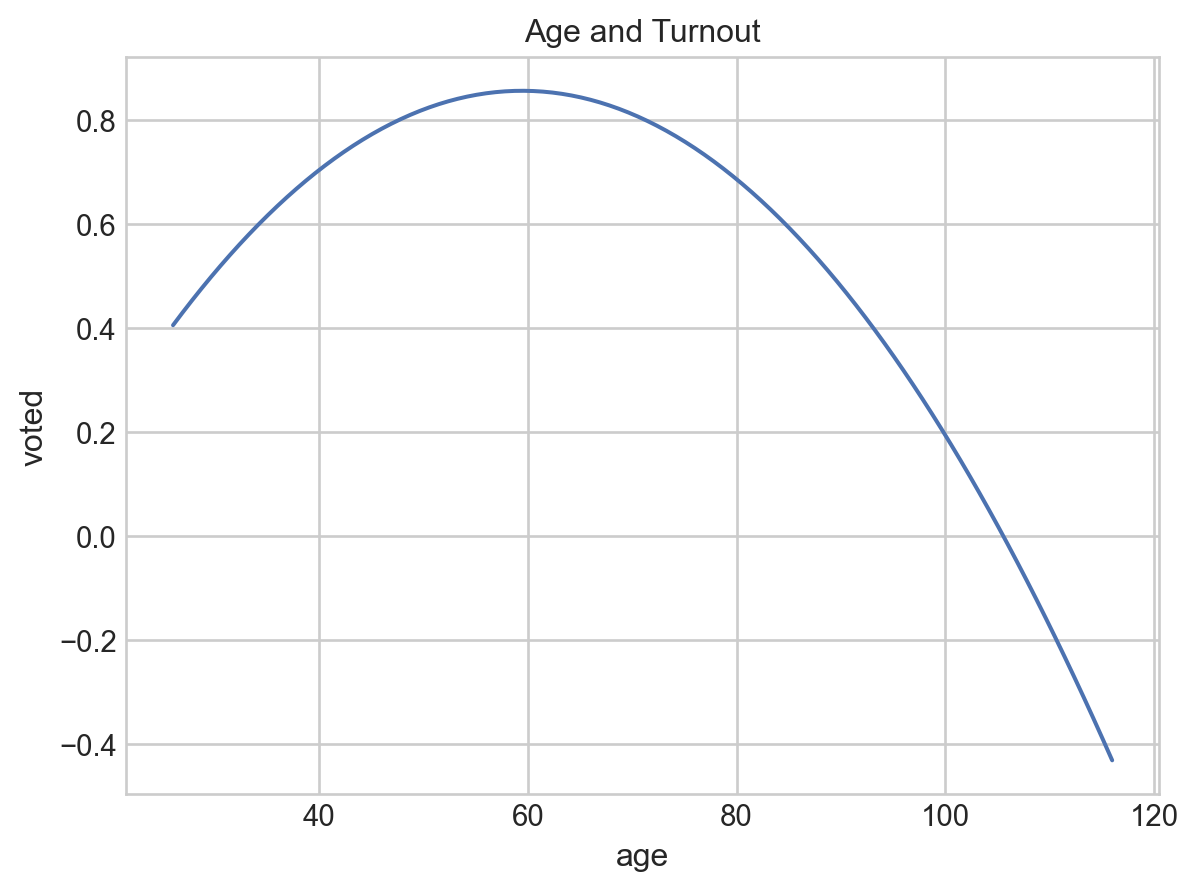

In [15]:
import seaborn.objects as so
from matplotlib import style
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

(
    so.Plot(voters, x="age", y="voted")
    .add(so.Line(), so.PolyFit(order=2))
    .label(title="Age and Turnout")
    .theme({**style.library["seaborn-v0_8-whitegrid"]})
)